In [1]:
from auxiliary_attendance_cache import *
import rpy2
import os 
import pickle

###############################################################################


### Load your R environment here:
os.environ['R_HOME'] = "C:/Users/Timo/Anaconda3/envs/R environment/Lib/R"


### R packages that have to be installed:

# rdrobust
# rddensity

###############################################################################

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

C:\Users\Timo\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


## Data Set

In [2]:
### Import Data set

df = get_data_Rmagic()

# Replication of Figure 2

In [3]:
### Density around cutoff
### consider only one GPA value for each student

df3 = get_truncated_data(df,0.5,1,"all courses")

df3 = collect_each_student(df3)
df3.head()

,studentid,firstyeargpa
0,3.0,7.036000
1,4.0,7.073684
2,12.0,6.506667
3,13.0,6.596491
4,15.0,7.070176


Implementation of R-magic:

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



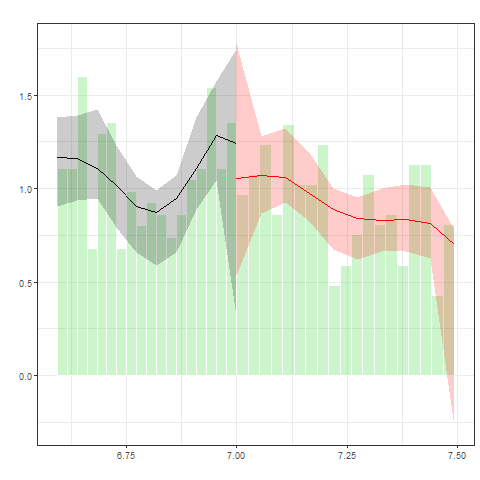

In [4]:
%%R -i df3 -o graph1

library("rddensity")

graph1 <- rdplotdensity(rdd=rddensity(X=df3$firstyeargpa,c=7),X=df3$firstyeargpa)$estplot

## Replication of Table 4

**voluntary courses**

In [5]:
df_vol = get_truncated_data(df,"total range",1,"voluntary")

In [6]:
%%R -i df_vol -o vol_rslt

library("rdrobust")
vol_rslt <- matrix(NaN,3,4)

rslt <- rdrobust(y=df_vol$attendance,df_vol$firstyeargpa_centered,cluster=df_vol$studentid,c=0.00001,h=0.365)
vol_rslt[1,1] <- rslt$coef[1]
vol_rslt[1,2] <- rslt$se[1]
vol_rslt[1,3] <- rslt$pv[1]
vol_rslt[1,4] <- sum(rslt$N_h)

rslt <- rdrobust(y=df_vol$stdgrade,df_vol$firstyeargpa_centered,cluster=df_vol$studentid,c=0.00001,h=0.365)
vol_rslt[2,1] <- rslt$coef[1]
vol_rslt[2,2] <- rslt$se[1]
vol_rslt[2,3] <- rslt$pv[1]
vol_rslt[2,4] <- sum(rslt$N_h)

rslt <- rdrobust(y=df_vol$passcourse,df_vol$firstyeargpa_centered,cluster=df_vol$studentid,c=0.00001,h=0.365)
vol_rslt[3,1] <- rslt$coef[1]
vol_rslt[3,2] <- rslt$se[1]
vol_rslt[3,3] <- rslt$pv[1]
vol_rslt[3,4] <- sum(rslt$N_h)

[1]

C:\Users\Timo\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:62: UserWarning: Error while trying to convert the column "coursepolicy". Fall back to string conversion. The error is: module 'pandas' has no attribute 'NA'
  % (name, str(e)))


 "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."


In [7]:
vol_rslt = vol_rslt
vol_rslt = pd.DataFrame(vol_rslt)

### save results as pickle file

pd.to_pickle(vol_rslt, "./vol_rslt_pkl.pkl")

**encouraged courses**

In [8]:
df_enc = get_truncated_data(df,"total range",1,"encouraged")

In [9]:
%%R -i df_enc -o rs

library("rdrobust")
rs <- matrix(NaN,3,4)

rslt <- rdrobust(y=df_enc$attendance,df_enc$firstyeargpa_centered,cluster=df_enc$studentid,c=0.0001,h=0.365)
rs[1,1] <- rslt$coef[1]
rs[1,2] <- rslt$se[1]
rs[1,3] <- rslt$pv[1]
rs[1,4] <- sum(rslt$N_h)

rslt <- rdrobust(y=df_enc$stdgrade,df_enc$firstyeargpa_centered,cluster=df_enc$studentid,c=0.0001,h=0.365)
rs[2,1] <- rslt$coef[1]
rs[2,2] <- rslt$se[1]
rs[2,3] <- rslt$pv[1]
rs[2,4] <- sum(rslt$N_h)

rslt <- rdrobust(y=df_enc$passcourse,df_enc$firstyeargpa_centered,cluster=df_enc$studentid,c=0.0001,h=0.365)
rs[3,1] <- rslt$coef[1]
rs[3,2] <- rslt$se[1]
rs[3,3] <- rslt$pv[1]
rs[3,4] <- sum(rslt$N_h)

[1] "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."


In [10]:
enc_rslt = rs
enc_rslt = pd.DataFrame(enc_rslt)

### save results as pickle file
pd.to_pickle(enc_rslt, "./enc_rslt_pkl.pkl")

**forced courses**

In [11]:
df_for = get_truncated_data(df,"total range",1,"forced")

In [12]:
%%R -i df_for -o rs

library("rdrobust")
rs <- matrix(NaN,3,4)

rslt <- rdrobust(y=df_for$attendance,df_for$firstyeargpa_centered,cluster=df_for$studentid,c=0.0001,h=0.365)
rs[1,1] <- rslt$coef[1]
rs[1,2] <- rslt$se[1]
rs[1,3] <- rslt$pv[1]
rs[1,4] <- sum(rslt$N_h)

rslt <- rdrobust(y=df_for$stdgrade,df_for$firstyeargpa_centered,cluster=df_for$studentid,c=0.0001,h=0.365)
rs[2,1] <- rslt$coef[1]
rs[2,2] <- rslt$se[1]
rs[2,3] <- rslt$pv[1]
rs[2,4] <- sum(rslt$N_h)

rslt <- rdrobust(y=df_for$passcourse,df_for$firstyeargpa_centered,cluster=df_for$studentid,c=0.0001,h=0.365)
rs[3,1] <- rslt$coef[1]
rs[3,2] <- rslt$se[1]
rs[3,3] <- rslt$pv[1]
rs[3,4] <- sum(rslt$N_h)

[1] "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."
[1] "Mass points detected in the running variable."


In [13]:
for_rslt = rs
for_rslt = pd.DataFrame(for_rslt)

### save results as pickle file
pd.to_pickle(for_rslt, "./for_rslt_pkl.pkl")

# Fakecutoff Test

**Cutoff at 6**

In [14]:
df_fake6 = get_fakecutoff_val(df,"voluntary",6,"stdgrade")

In [15]:
%%R -i df_fake6 -o rs

library("rdrobust")
rs <- matrix(NaN,1,3)

rslt <- rdrobust(y=df_fake6$stdgrade,df_fake6$X_fake,cluster=df_fake6$studentid,c=0,h=0.365)
rs[1,1] <- 6
rs[1,2] <- rslt$coef[1]
rs[1,3] <- rslt$pv[1]


[1] "Mass points detected in the running variable."


In [16]:
rslt6 = rs

**Cutoff at 8**

In [17]:
df_fake8 = get_fakecutoff_val(df,"voluntary",8,"stdgrade")

In [18]:
%%R -i df_fake8 -o rs

library("rdrobust")
rs <- matrix(NaN,1,3)

rslt <- rdrobust(y=df_fake8$stdgrade,df_fake8$X_fake,cluster=df_fake8$studentid,c=0,h=0.365)
rs[1,1] <- 8
rs[1,2] <- rslt$coef[1]
rs[1,3] <- rslt$pv[1]

[1] "Mass points detected in the running variable."


In [19]:
rslt8 = rs

**Cutoff at 8.25**

In [20]:
df_fake825 = get_fakecutoff_val(df,"voluntary",8.25,"stdgrade")

In [21]:
%%R -i df_fake825 -o rs

library("rdrobust")
rs <- matrix(NaN,1,3)

rslt <- rdrobust(y=df_fake825$stdgrade,df_fake825$X_fake,cluster=df_fake825$studentid,c=0,h=0.365)
rs[1,1] <- 8.25
rs[1,2] <- rslt$coef[1]
rs[1,3] <- rslt$pv[1]

[1] "Mass points detected in the running variable."


In [22]:
rslt825 = rs

**Cutoff at 9**

In [23]:
df_fake9 = get_fakecutoff_val(df,"voluntary",9,"stdgrade")

In [24]:
%%R -i df_fake9 -o rs

library("rdrobust")
rs <- matrix(NaN,1,3)

rslt <- rdrobust(y=df_fake9$stdgrade,df_fake9$X_fake,cluster=df_fake9$studentid,c=0,h=0.365)
rs[1,1] <- 9
rs[1,2] <- rslt$coef[1]
rs[1,3] <- rslt$pv[1]

[1] "Mass points detected in the running variable."


In [25]:
rslt9 = rs

In [26]:
### Collect all the results

rslt_fake_r = np.vstack((rslt6,rslt8,rslt825,rslt9))

In [27]:
### save results as pickle file

pd.to_pickle(rslt_fake_r, "./rslt_fake_r_pkl.pkl")